<a href="https://colab.research.google.com/github/kidujm/data_mini_project/blob/main/df_%EC%9C%A0%EC%A0%95%EB%AF%BC_0212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단변량 EDA
### 진행할 컬럼
- 역_거리
- 주점_밀도
- 역_접근성
- 시도명

In [1]:
import pandas as pd

# 파일을 불러와 'df'라는 이름의 변수에 저장합니다.
df = pd.read_csv('최종분석파일.csv')

# 불러온 데이터의 상위 5행을 확인합니다.
print(df.head())

   brand    시도명  시군구명    행정동_코드  행정동명   법정동명                  도로명주소  \
0    투다리  서울특별시   용산구  11170625  한강로동  한강로1가     서울특별시 용산구 한강대로 205   
1    투다리  서울특별시  동대문구  11230740  이문1동    이문동    서울특별시 동대문구 휘경로2길 13   
2    투다리  서울특별시   광진구  11215830  자양2동    자양동     서울특별시 광진구 자양번영로 30   
3  역전할머니  서울특별시   강서구  11500591  화곡6동    화곡동  서울특별시 강서구 화곡로58길 22-3   
4    투다리  서울특별시   송파구  11710650  잠실본동    잠실동    서울특별시 송파구 올림픽로8길 20   

           경도         위도    place_id  ...  월평균_블로그수  역세권_구분  월평균_방문자리뷰수  \
0  126.972619  37.536585    11763577  ...      1.07    초역세권        4.55   
1  127.060942  37.595408    38623490  ...      0.88     역세권        1.03   
2  127.075723  37.532276    38008590  ...      2.58    비역세권        2.37   
3  126.852178  37.552714  1868359886  ...      2.82    비역세권        7.46   
4  127.080089  37.510000  1978859905  ...      1.80     역세권        1.78   

  비주얼_지수  상권_침투율 디지털_관심도_지수  주점_밀도  역_접근성    투다리_비율  역전할머니_비율  
0   0.19  0.0004       0.48      1     근접  1.000000  0.000

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       576 non-null    object 
 1   시도명         576 non-null    object 
 2   시군구명        576 non-null    object 
 3   행정동_코드      576 non-null    int64  
 4   행정동명        576 non-null    object 
 5   법정동명        576 non-null    object 
 6   도로명주소       576 non-null    object 
 7   경도          576 non-null    float64
 8   위도          576 non-null    float64
 9   place_id    576 non-null    int64  
 10  월간 검색량      576 non-null    float64
 11  블로그누적발행     576 non-null    float64
 12  방문자사진수      576 non-null    float64
 13  역명          576 non-null    object 
 14  역_거리        576 non-null    float64
 15  추정_개업일      576 non-null    object 
 16  방문자리뷰수      576 non-null    float64
 17  블로그리뷰수      576 non-null    float64
 18  총유동인구_수     576 non-null    float64
 19  영업_개월_수     576 non-null    i

#역_거리
- 평균값vs중앙값 (두 값이 차이가 크다면 데이터가 한쪽으로 쏠려있다는 뜻)
- 평균이 중앙값보다 훨씬 크다는 것은,역에서 아주 멀리떨어진 소수의 매장들이 평균값을 위로 끌어올리고 있다는 뜻
- **중앙값(478m)**이 보여주듯 대부분의 매장이 역세권(도보 5~7분)에 모여 있음
- ** 몇몇 멀리 떨어진 매장이 평균치를 끌어올릴 뿐 대부분의 매장이 역세권에 옹기종기 모여있음을 의미**
- max(최댓값) (이상치확인)
- 75% 지점의 거리가 1,113m인 것에 비해, 최댓값은 **20,889m(약 20km)**에 달합니다. 이는 일반적인 시내 상권과는 거리가 먼 극단적인 데이터가 포함되어 있음을 시사합니다.

In [6]:
df['역_거리'].describe()

,역_거리
count,576.000000
mean,1325.625521
std,2884.274931
min,3.000000
25%,231.750000
50%,478.500000
75%,1113.000000
max,20889.700000


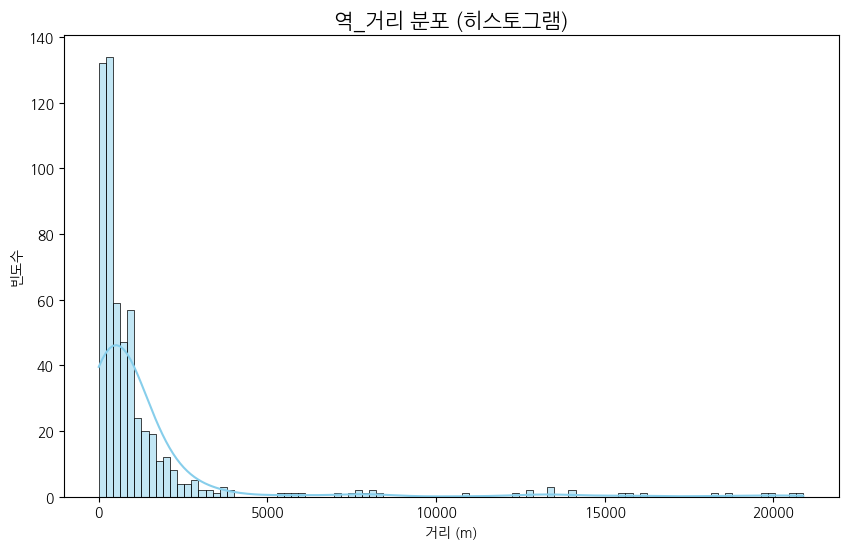

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.figure(figsize=(10, 6))
sns.histplot(df['역_거리'], kde=True, color='skyblue')
plt.title('역_거리 분포 (히스토그램)', fontsize=15)
plt.xlabel('거리 (m)')
plt.ylabel('빈도수')
plt.show()

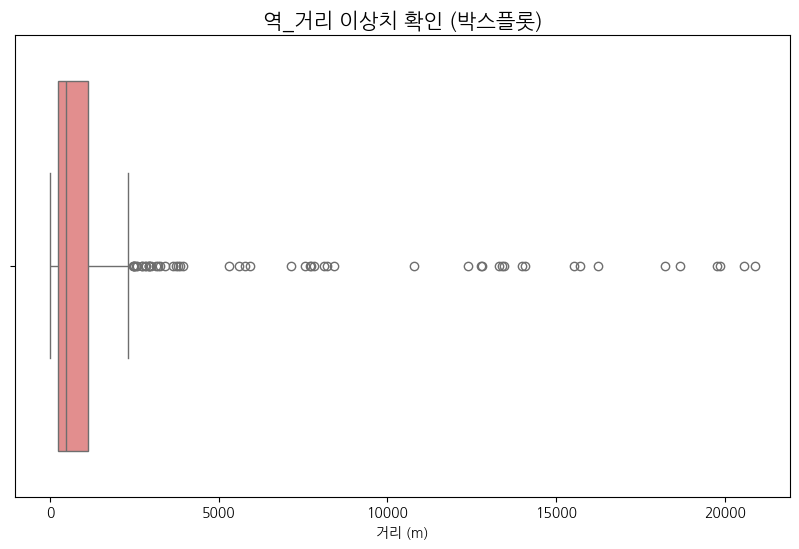

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['역_거리'], color='lightcoral')
plt.title('역_거리 이상치 확인 (박스플롯)', fontsize=15)
plt.xlabel('거리 (m)')
plt.show()

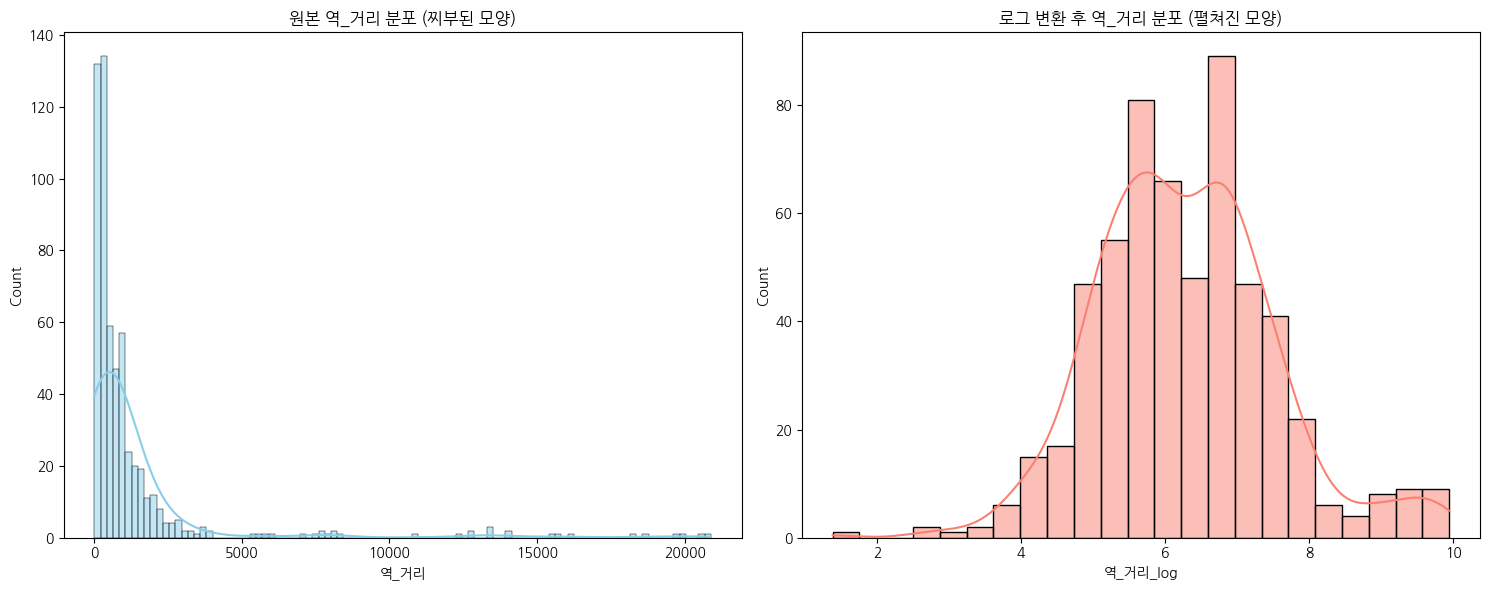

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 로그 변환 적용 (새로운 컬럼 생성)
df['역_거리_log'] = np.log1p(df['역_거리'])

# 2. 시각화: 원본 vs 로그 변환 비교
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 원본 데이터 (찌부된 모양)
sns.histplot(df['역_거리'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('원본 역_거리 분포 (찌부된 모양)')

# 로그 변환 데이터 (펼쳐진 모양)
sns.histplot(df['역_거리_log'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('로그 변환 후 역_거리 분포 (펼쳐진 모양)')

plt.tight_layout()
plt.show()

In [18]:
# 나눔 폰트 설치 및 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치된 폰트를 matplotlib에 적용
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 주점밀도
- count: 576.0 (전체 데이터 개수)

- mean: 1.92 (평균적으로 동네당 약 1.9개의 매장 존재)

- min: 1.0 (최소 1개 이상 입점)

- 50% (중앙값): 2.0

- max: 8.0 (특정 동네에는 최대 8개까지 밀집)

- 밀집도 편중: 중앙값과 75% 지점이 모두 2.0이다. 이는 우리 데이터의 대다수가 한 동네에 매장이 1~2개만 있다는 뜻이다.

- 이상치의 의미 박스플롯의 최상단에 튀어있는 8.0 이라는 숫자는 매우 강력한 핵심 상권이라는 뜻

- ** 보통은 동네에 1개 혹은 경쟁자 하나 정도 매장이 8개나 몰린 곳은 격전지 (홍대와 같은 핫플레이스)**

In [22]:
# '주점_밀도' 컬럼의 기술통계 확인
print(df['주점_밀도'].describe())

count    576.000000
mean       1.920139
std        1.221778
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        8.000000
Name: 주점_밀도, dtype: float64


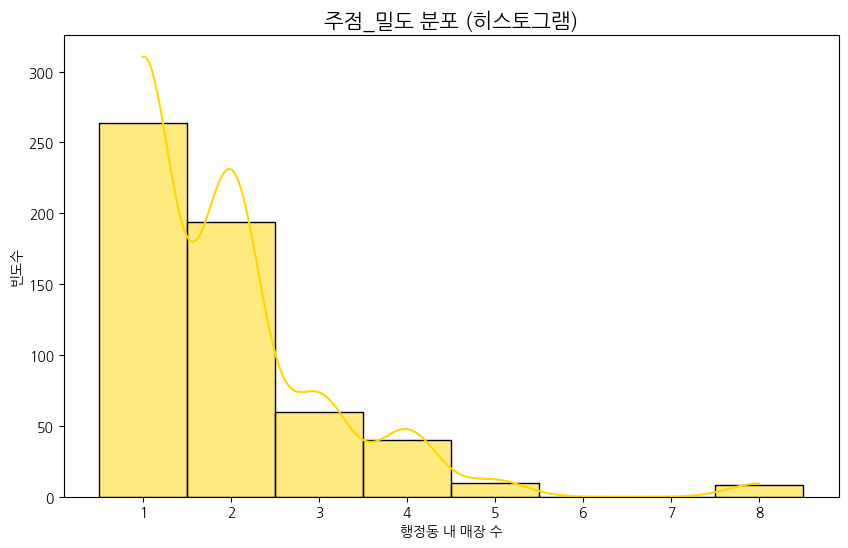

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# discrete=True 옵션을 쓰면 정수 단위로 막대가 예쁘게 정렬됩니다.
sns.histplot(df['주점_밀도'], kde=True, color='gold', discrete=True)
plt.title('주점_밀도 분포 (히스토그램)', fontsize=15)
plt.xlabel('행정동 내 매장 수')
plt.ylabel('빈도수')
plt.show()

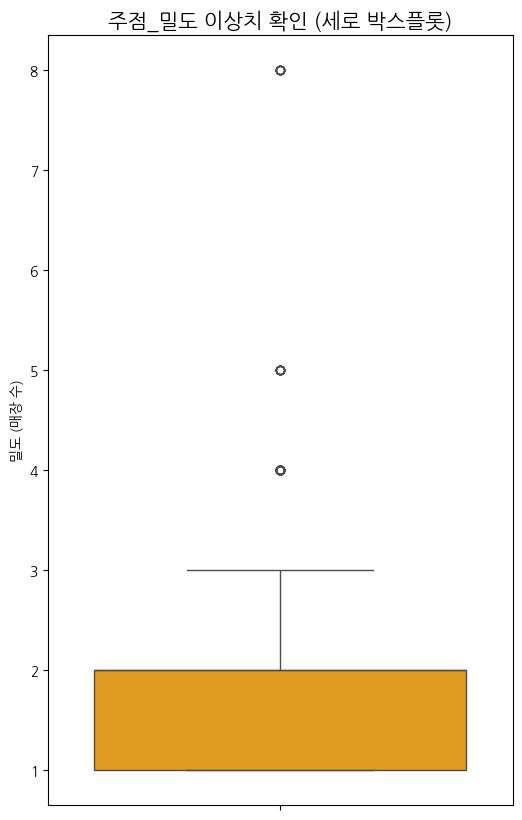

In [24]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['주점_밀도'], color='orange')
plt.title('주점_밀도 이상치 확인 (세로 박스플롯)', fontsize=15)
plt.ylabel('밀도 (매장 수)')
plt.show()

# 역_접근성
- 반도수 확인
- 역 근처 매장과 먼 매장의 개수가 거의 똑같음
- ** 나중에 역 근처 매장이 진짜 리뷰 점수가 더 높은지 확실하게 밝힐 수 있는 지표 **

In [25]:
# '역_접근성' 항목별 빈도수 확인
print(df['역_접근성'].value_counts())

역_접근성
근접     292
비근접    284
Name: count, dtype: int64


/tmp/ipython-input-1107784469.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='역_접근성', palette='Set2')


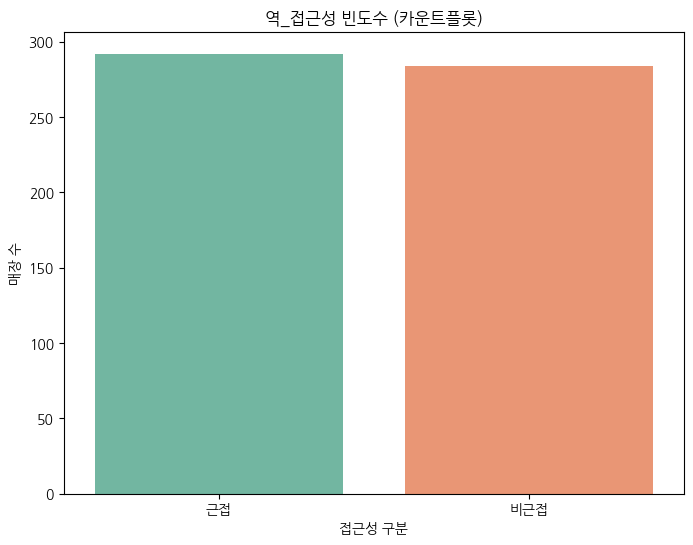

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 캔버스 크기 설정 (가로 8, 세로 6)
plt.figure(figsize=(8, 6))

# x축에 '역_접근성'을 넣고, palette='Set2' 색상 테마 적용
sns.countplot(data=df, x='역_접근성', palette='Set2')

plt.title('역_접근성 빈도수 (카운트플롯)')
plt.xlabel('접근성 구분')
plt.ylabel('매장 수')

# 이미지 파일로 저장하려면 아래 주석을 해제하세요.
# plt.savefig('역_접근성_카운트플롯.png')

plt.show()

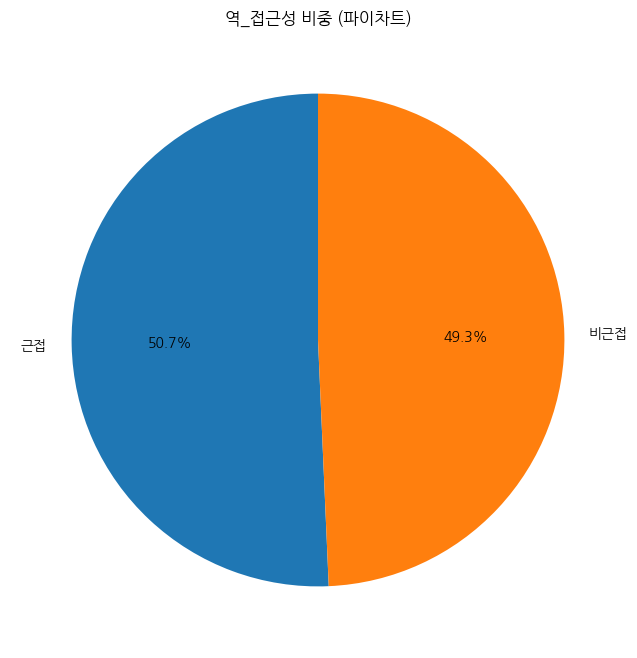

In [28]:
# 캔버스 크기 설정 (가로 8, 세로 8 -> 정사각형)
plt.figure(figsize=(8, 8))

# 빈도수를 파이차트로 그리기
# autopct='%1.1f%%': 소수점 첫째 자리까지 비율 표시
# startangle=90: 시작 각도를 90도로 설정하여 '근접'이 위에서부터 시작하도록 함
df['역_접근성'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

plt.title('역_접근성 비중 (파이차트)')
plt.ylabel('') # 파이차트 옆에 불필요하게 뜨는 y축 라벨 제거

# 이미지 파일로 저장하려면 아래 주석을 해제하세요.
# plt.savefig('역_접근성_파이차트.png')

plt.show()

# 시도명
- ** 경기도가 더 많음 **
- 우리 데이터의 약 **58%**는 경기도에 있는 매장이고, **42%**는 서울에 있는 매장

In [29]:
# '시도명' 항목별 빈도수 확인
print(df['시도명'].value_counts())

시도명
경기도      333
서울특별시    243
Name: count, dtype: int64


/tmp/ipython-input-854071175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='시도명', order=df['시도명'].value_counts().index, palette='pastel')


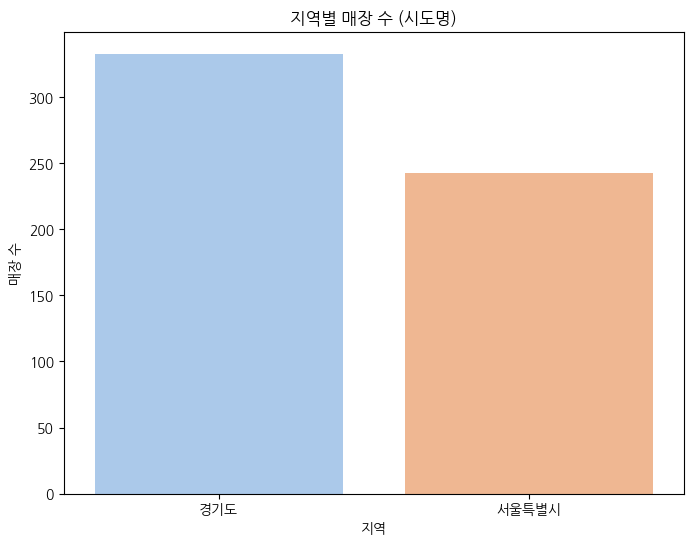

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
# '시도명' 컬럼의 빈도수를 막대 그래프로 표현
sns.countplot(data=df, x='시도명', order=df['시도명'].value_counts().index, palette='pastel')
plt.title('지역별 매장 수 (시도명)')
plt.xlabel('지역')
plt.ylabel('매장 수')
plt.show()

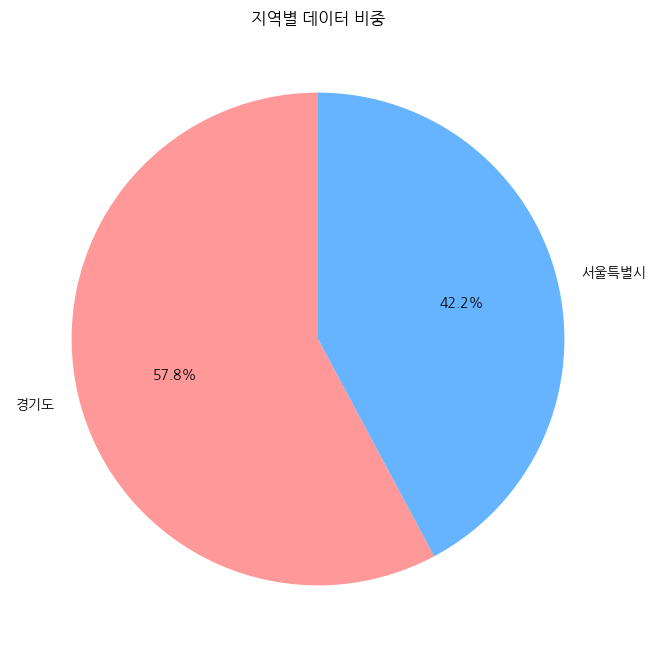

In [31]:
plt.figure(figsize=(8, 8))
#autopct='%1.1f%%'는 소수점 첫째 자리까지 %를 표시하라는 뜻입니다.
df['시도명'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('지역별 데이터 비중')
plt.ylabel('')
plt.show()

# brand
데이터의 개수가 어느 한쪽으로 치우치지 않고 완벽하게 동일하다는 것은, 이후에 진행할 모든 비교 분석(예: 어느 브랜드가 리뷰가 더 많은가?)에서 가장 공정한 결과를 얻을 수 있다는 뜻입니다.

In [32]:
# 'brand' 항목별 빈도수 확인
print(df['brand'].value_counts())

brand
투다리      292
역전할머니    284
Name: count, dtype: int64


/tmp/ipython-input-3394276606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='brand', palette='Set1')


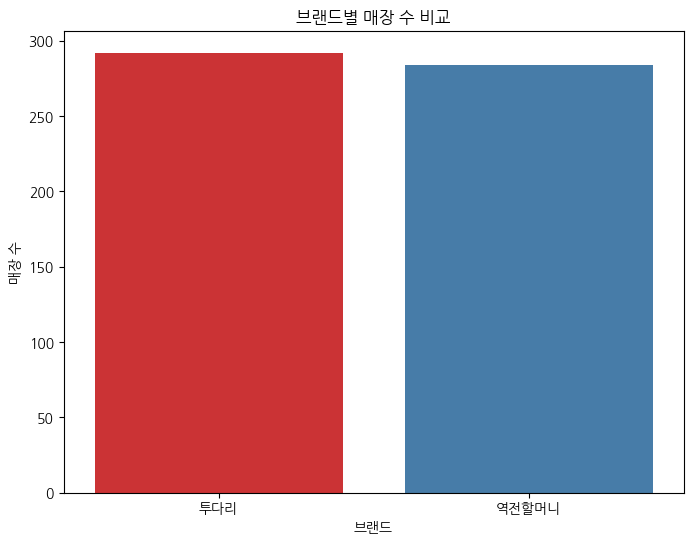

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
# 'brand' 컬럼의 빈도수를 막대 그래프로 표현
sns.countplot(data=df, x='brand', palette='Set1')
plt.title('브랜드별 매장 수 비교')
plt.xlabel('브랜드')
plt.ylabel('매장 수')
plt.show()

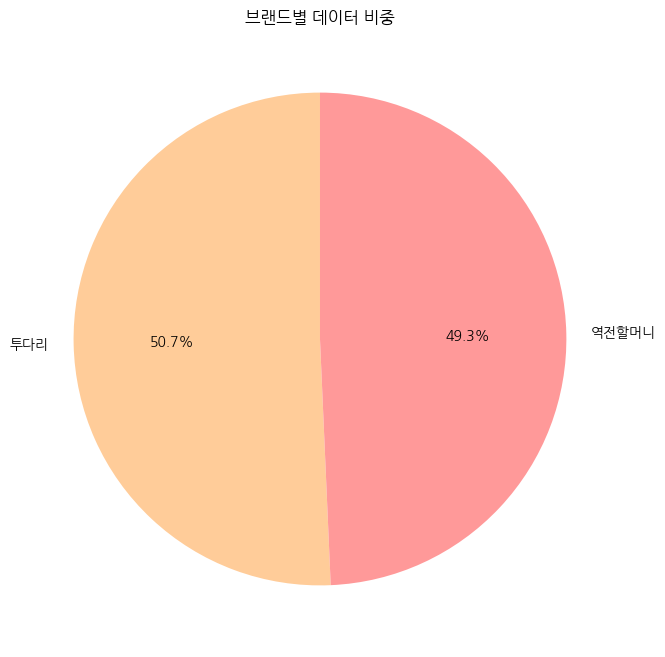

In [34]:
plt.figure(figsize=(8, 8))
df['brand'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ffcc99','#ff9999'])
plt.title('브랜드별 데이터 비중')
plt.ylabel('')
plt.show()

# 얻을 수 있는 인사이트
분석 지표,도출된 인사이트 (Key Insights)
입지 쏠림,"역_거리 분석 결과, 대다수 매장은 **역세권(500m 내외)**에 밀집해 있으며 장거리 매장은 특수 사례(이상치)임."
비교 공정성,"brand와 역_접근성의 비중이 거의 1:1로, 집단 간 성과 비교 시 통계적 신뢰도가 매우 높음."
지역적 특성,"서울보다 경기도 매장 비중이 높아, 주거 밀착형 상권의 성과 비중이 클 것으로 예상됨."
경쟁 강도,"대부분 지역은 주점이 1~2개이나, 밀도가 8인 핵심 상권을 별도로 분리하여 분석할 가치가 있음."
